#### get the data for the stocks that came out in the portfolio 
#### we are downloading that from yahoo 

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from fbprophet import Prophet
from datetime import datetime
import datetime

%matplotlib inline

import seaborn as sns
sns.set(style="ticks")


In [2]:
trading_tickers = pd.read_csv ('trading_indicators.csv')

In [3]:
trading_tickers

,Unnamed: 0,Ticker_index,Ticker_name
0,0,48,YESBANK.NS
1,1,2,ASIANPAINT.NS
2,2,46,VEDL.NS
3,3,40,TCS.NS
4,4,26,IOC.NS


In [4]:
tickers_for_model = trading_tickers.Ticker_name.tolist()

In [5]:
import fix_yahoo_finance as yf
from pandas_datareader import data as pdr

In [6]:
tickers_for_model

['YESBANK.NS', 'ASIANPAINT.NS', 'VEDL.NS', 'TCS.NS', 'IOC.NS']

In [7]:
yf.pdr_override()

In [8]:
start_date = '2015-01-01'
end_date = '2018-01-01'


In [9]:
ap_data =  pdr.get_data_yahoo('ASIANPAINT.NS', start_date, end_date)

[*********************100%***********************]  1 of 1 downloaded


#### do the preprocessing of data 

In [10]:
ap_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-01,751.099976,754.500000,747.000000,749.150024,731.869751,284935
2015-01-02,751.250000,781.450012,751.250000,775.049988,757.172302,2080850
2015-01-05,779.900024,787.900024,772.700012,775.000000,757.123535,1326999
2015-01-06,775.000000,783.000000,750.400024,756.500000,739.050232,1510720
2015-01-07,763.400024,778.349976,759.250000,771.700012,753.899658,1427667


In [11]:
ap_data.info() 


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 741 entries, 2015-01-01 to 2018-01-01
Data columns (total 6 columns):
Open         741 non-null float64
High         741 non-null float64
Low          741 non-null float64
Close        741 non-null float64
Adj Close    741 non-null float64
Volume       741 non-null int32
dtypes: float64(5), int32(1)
memory usage: 37.6 KB


In [12]:
spy =  pdr.get_data_yahoo('^GSPC', start_date, end_date)

[*********************100%***********************]  1 of 1 downloaded


In [13]:
spy.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-12-31,2082.110107,2085.580078,2057.939941,2058.899902,2058.899902,-1688897296
2015-01-02,2058.899902,2072.360107,2046.040039,2058.199951,2058.199951,-1586267296
2015-01-05,2054.439941,2054.439941,2017.339966,2020.579956,2020.579956,-495847296
2015-01-06,2022.150024,2030.250000,1992.439941,2002.609985,2002.609985,165142704
2015-01-07,2005.550049,2029.609985,2005.550049,2025.900024,2025.900024,-489487296


In [14]:
spy.rename(columns={'Adj Close': 'SPY'}, inplace=True)

In [15]:
spy.drop (['Open','Close','High','Low','Volume'] , axis =1 , inplace = True)

In [16]:
spy.head()

,SPY
Date,
2014-12-31,2058.899902
2015-01-02,2058.199951
2015-01-05,2020.579956
2015-01-06,2002.609985
2015-01-07,2025.900024


In [17]:
dji =  pdr.get_data_yahoo('^DJI', start_date, end_date)

[*********************100%***********************]  1 of 1 downloaded


In [18]:
dji.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-12-31,17987.660156,18043.220703,17820.880859,17823.070313,17823.070313,82840000
2015-01-02,17823.070313,17951.779297,17731.300781,17832.990234,17832.990234,76270000
2015-01-05,17821.300781,17821.300781,17475.929688,17501.650391,17501.650391,116160000
2015-01-06,17504.179688,17581.050781,17262.369141,17371.640625,17371.640625,101870000
2015-01-07,17374.779297,17597.080078,17374.779297,17584.519531,17584.519531,91030000


In [19]:
dji.rename(columns={'Adj Close': 'DJ'}, inplace=True)

In [20]:
dji.drop (['Open','Close','High','Low','Volume'] , axis =1 , inplace = True)

In [21]:
nasdaq =  pdr.get_data_yahoo('^IXIC', start_date, end_date)

[*********************100%***********************]  1 of 1 downloaded


In [22]:
nasdaq.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-12-31,4790.529785,4806.430176,4734.109863,4736.049805,4736.049805,1515600000
2015-01-02,4760.240234,4777.009766,4698.109863,4726.810059,4726.810059,1435150000
2015-01-05,4700.339844,4702.770020,4641.459961,4652.569824,4652.569824,1794470000
2015-01-06,4666.850098,4667.330078,4567.589844,4592.740234,4592.740234,-2127647296
2015-01-07,4626.839844,4652.720215,4613.899902,4650.470215,4650.470215,1957950000


In [23]:
nasdaq.rename(columns={'Adj Close': 'NASDAQ'}, inplace=True)

In [24]:
nasdaq.drop (['Open','Close','High','Low','Volume'] , axis =1 , inplace = True)

In [25]:
nse =  pdr.get_data_yahoo('^NSEI', start_date, end_date)

[*********************100%***********************]  1 of 1 downloaded


In [26]:
nse.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,8288.700195,8410.599609,8288.700195,8395.450195,8395.450195,101900
2015-01-05,8407.950195,8445.599609,8363.900391,8378.400391,8378.400391,118200
2015-01-06,8325.299805,8327.849609,8111.350098,8127.350098,8127.350098,172800
2015-01-07,8118.649902,8151.200195,8065.450195,8102.100098,8102.100098,164100
2015-01-08,8191.399902,8243.500000,8167.299805,8234.599609,8234.599609,143800


In [27]:
nse.rename(columns={'Adj Close': 'NSE'}, inplace=True)

In [28]:
nse.drop (['Open','Close','High','Low','Volume'] , axis =1 , inplace = True)

In [29]:
ap_data = ap_data.join(nse )

In [30]:
ap_data = ap_data.join(nasdaq )

In [31]:
ap_data = ap_data.join(dji )

In [32]:
ap_data = ap_data.join(spy )

In [33]:
ap_data.head()

,Open,High,Low,Close,Adj Close,Volume,NSE,NASDAQ,DJ,SPY
Date,,,,,,,,,,
2015-01-01,751.099976,754.500000,747.000000,749.150024,731.869751,284935,NaN,NaN,NaN,NaN
2015-01-02,751.250000,781.450012,751.250000,775.049988,757.172302,2080850,8395.450195,4726.810059,17832.990234,2058.199951
2015-01-05,779.900024,787.900024,772.700012,775.000000,757.123535,1326999,8378.400391,4652.569824,17501.650391,2020.579956
2015-01-06,775.000000,783.000000,750.400024,756.500000,739.050232,1510720,8127.350098,4592.740234,17371.640625,2002.609985
2015-01-07,763.400024,778.349976,759.250000,771.700012,753.899658,1427667,8102.100098,4650.470215,17584.519531,2025.900024


In [34]:
ap_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 741 entries, 2015-01-01 to 2018-01-01
Data columns (total 10 columns):
Open         741 non-null float64
High         741 non-null float64
Low          741 non-null float64
Close        741 non-null float64
Adj Close    741 non-null float64
Volume       741 non-null int32
NSE          736 non-null float64
NASDAQ       719 non-null float64
DJ           719 non-null float64
SPY          719 non-null float64
dtypes: float64(9), int32(1)
memory usage: 80.8 KB


In [35]:
ap_data.fillna(method='ffill', inplace=True)

In [36]:
ap_data.fillna(method='bfill', inplace=True)

In [37]:
ap_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 741 entries, 2015-01-01 to 2018-01-01
Data columns (total 10 columns):
Open         741 non-null float64
High         741 non-null float64
Low          741 non-null float64
Close        741 non-null float64
Adj Close    741 non-null float64
Volume       741 non-null int32
NSE          741 non-null float64
NASDAQ       741 non-null float64
DJ           741 non-null float64
SPY          741 non-null float64
dtypes: float64(9), int32(1)
memory usage: 80.8 KB


In [38]:
ap_data = ap_data.reset_index()

In [39]:
ap_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 741 entries, 0 to 740
Data columns (total 11 columns):
Date         741 non-null datetime64[ns]
Open         741 non-null float64
High         741 non-null float64
Low          741 non-null float64
Close        741 non-null float64
Adj Close    741 non-null float64
Volume       741 non-null int32
NSE          741 non-null float64
NASDAQ       741 non-null float64
DJ           741 non-null float64
SPY          741 non-null float64
dtypes: datetime64[ns](1), float64(9), int32(1)
memory usage: 60.9 KB


In [40]:
ap_data['Date_index'] = pd.to_datetime(ap_data['Date'])

In [41]:
ap_data.set_index('Date_index',inplace = True)

In [58]:
ap_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,NSE,NASDAQ,DJ,SPY,pcod,hld,rsi
Date_index,,,,,,,,,,,,,,
2015-01-01,2015-01-01,751.099976,754.500000,747.000000,749.150024,731.869751,284935,8395.450195,4726.810059,17832.990234,2058.199951,NaN,7.500000,NaN
2015-01-02,2015-01-02,751.250000,781.450012,751.250000,775.049988,757.172302,2080850,8395.450195,4726.810059,17832.990234,2058.199951,2.099976,30.200012,NaN
2015-01-05,2015-01-05,779.900024,787.900024,772.700012,775.000000,757.123535,1326999,8378.400391,4652.569824,17501.650391,2020.579956,4.850036,15.200012,NaN
2015-01-06,2015-01-06,775.000000,783.000000,750.400024,756.500000,739.050232,1510720,8127.350098,4592.740234,17371.640625,2002.609985,0.000000,32.599976,NaN
2015-01-07,2015-01-07,763.400024,778.349976,759.250000,771.700012,753.899658,1427667,8102.100098,4650.470215,17584.519531,2025.900024,6.900024,19.099976,NaN


In [65]:
ap_data.reset_index(inplace = True)

In [43]:
#Function for difference between current day's opening price and previous day's closing price

def pcod(stock):
    stock['pcod'] = stock['Open'] - stock['Close'].shift(1)
    return stock

In [44]:
ap_data = pcod (ap_data)

In [45]:
#Function for difference between current day's highest price and lowest price

def hld(stock):
    stock['hld'] = stock['High'] - stock['Low']
    return stock

In [46]:
ap_data = hld (ap_data)

In [47]:
ap_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,NSE,NASDAQ,DJ,SPY,pcod,hld
Date_index,,,,,,,,,,,,,
2015-01-01,2015-01-01,751.099976,754.500000,747.000000,749.150024,731.869751,284935,8395.450195,4726.810059,17832.990234,2058.199951,NaN,7.500000
2015-01-02,2015-01-02,751.250000,781.450012,751.250000,775.049988,757.172302,2080850,8395.450195,4726.810059,17832.990234,2058.199951,2.099976,30.200012
2015-01-05,2015-01-05,779.900024,787.900024,772.700012,775.000000,757.123535,1326999,8378.400391,4652.569824,17501.650391,2020.579956,4.850036,15.200012
2015-01-06,2015-01-06,775.000000,783.000000,750.400024,756.500000,739.050232,1510720,8127.350098,4592.740234,17371.640625,2002.609985,0.000000,32.599976
2015-01-07,2015-01-07,763.400024,778.349976,759.250000,771.700012,753.899658,1427667,8102.100098,4650.470215,17584.519531,2025.900024,6.900024,19.099976


In [62]:
# Function for Relative Strength Index
def stockRsi(stock, numOfDays): 
    
    delta = stock['Close'].diff()
    
    #print (delta)
    
    deltaUp = np.where(delta>0, delta, 0)
    
    #print (deltaUp) 
    
    deltaDown = np.where(delta<0, delta, 0)
    
    dfDeltaUp = pd.DataFrame(data=deltaUp, columns=['deltaUp'])
    
    dfDeltaDown = pd.DataFrame(data=deltaDown, columns=['deltaDown'])
    
    rollingDf = pd.DataFrame(np.zeros, index=range(0,len(stock['Close'])), 
                             columns=['rollingUp','rollingDown'])
    
   
    
    rollingDf['rollingUp'] = dfDeltaUp.rolling(window=numOfDays).mean()
    #rollingDf['rollingUp'].fillna(0, inplace=True)
    
    #print (rollingDf)
    
    rollingDf['rollingDown'] = dfDeltaDown.rolling(window=numOfDays).mean()
    #rollingDf['rollingDown'].fillna(0, inplace=True)
    
    #print (rollingDf)
    
    rollingDf['RS'] = (rollingDf['rollingUp'] / rollingDf['rollingDown']).abs()
    
    rsi = 100.0 - (100.0/(1.0 + rollingDf['RS']))
            
    stock['rsi'] = rsi
    
    return stock

In [66]:
ap_data = stockRsi(ap_data,20)

In [68]:
ap_data

,Date_index,Date,Open,High,Low,Close,Adj Close,Volume,NSE,NASDAQ,DJ,SPY,pcod,hld,rsi
0,2015-01-01,2015-01-01,751.099976,754.500000,747.000000,749.150024,731.869751,284935,8395.450195,4726.810059,17832.990234,2058.199951,NaN,7.500000,NaN
1,2015-01-02,2015-01-02,751.250000,781.450012,751.250000,775.049988,757.172302,2080850,8395.450195,4726.810059,17832.990234,2058.199951,2.099976,30.200012,NaN
2,2015-01-05,2015-01-05,779.900024,787.900024,772.700012,775.000000,757.123535,1326999,8378.400391,4652.569824,17501.650391,2020.579956,4.850036,15.200012,NaN
3,2015-01-06,2015-01-06,775.000000,783.000000,750.400024,756.500000,739.050232,1510720,8127.350098,4592.740234,17371.640625,2002.609985,0.000000,32.599976,NaN
4,2015-01-07,2015-01-07,763.400024,778.349976,759.250000,771.700012,753.899658,1427667,8102.100098,4650.470215,17584.519531,2025.900024,6.900024,19.099976,NaN
5,2015-01-08,2015-01-08,783.799988,822.900024,778.099976,820.349976,801.427429,2769416,8234.599609,4736.189941,17907.869141,2062.139893,12.099976,44.800048,NaN
6,2015-01-09,2015-01-09,828.450012,829.000000,804.049988,812.500000,793.758545,1708427,8284.500000,4704.069824,17737.369141,2044.810059,8.100036,24.950012,NaN
7,2015-01-12,2015-01-12,813.049988,818.400024,800.200012,807.750000,789.118042,1320557,8323.000000,4664.709961,17640.839844,2028.260010,0.549988,18.200012,NaN
8,2015-01-13,2015-01-13,813.000000,842.450012,812.099976,833.849976,814.616028,3835281,8299.400391,4661.500000,17613.679688,2023.030029,5.250000,30.350036,NaN
9,2015-01-14,2015-01-14,840.000000,850.000000,830.200012,842.650024,823.213074,2320114,8277.549805,4639.319824,17427.089844,2011.270020,6.150024,19.799988,NaN


In [69]:
ap_data.set_index('Date_index', inplace = True)

In [70]:
ap_data

,Date,Open,High,Low,Close,Adj Close,Volume,NSE,NASDAQ,DJ,SPY,pcod,hld,rsi
Date_index,,,,,,,,,,,,,,
2015-01-01,2015-01-01,751.099976,754.500000,747.000000,749.150024,731.869751,284935,8395.450195,4726.810059,17832.990234,2058.199951,NaN,7.500000,NaN
2015-01-02,2015-01-02,751.250000,781.450012,751.250000,775.049988,757.172302,2080850,8395.450195,4726.810059,17832.990234,2058.199951,2.099976,30.200012,NaN
2015-01-05,2015-01-05,779.900024,787.900024,772.700012,775.000000,757.123535,1326999,8378.400391,4652.569824,17501.650391,2020.579956,4.850036,15.200012,NaN
2015-01-06,2015-01-06,775.000000,783.000000,750.400024,756.500000,739.050232,1510720,8127.350098,4592.740234,17371.640625,2002.609985,0.000000,32.599976,NaN
2015-01-07,2015-01-07,763.400024,778.349976,759.250000,771.700012,753.899658,1427667,8102.100098,4650.470215,17584.519531,2025.900024,6.900024,19.099976,NaN
2015-01-08,2015-01-08,783.799988,822.900024,778.099976,820.349976,801.427429,2769416,8234.599609,4736.189941,17907.869141,2062.139893,12.099976,44.800048,NaN
2015-01-09,2015-01-09,828.450012,829.000000,804.049988,812.500000,793.758545,1708427,8284.500000,4704.069824,17737.369141,2044.810059,8.100036,24.950012,NaN
2015-01-12,2015-01-12,813.049988,818.400024,800.200012,807.750000,789.118042,1320557,8323.000000,4664.709961,17640.839844,2028.260010,0.549988,18.200012,NaN
2015-01-13,2015-01-13,813.000000,842.450012,812.099976,833.849976,814.616028,3835281,8299.400391,4661.500000,17613.679688,2023.030029,5.250000,30.350036,NaN


In [71]:
# Function for short-term moving average
def stma(stock, numOfDays):
    stock['stma'] = stock['Close'].rolling(window=numOfDays).mean()
    return stock

In [72]:
ap_data = stma (ap_data, 20)

In [73]:
# Function for long-term moving average
def ltma(stock, numOfDays):
    stock['ltma'] = stock['Close'].rolling(window=numOfDays).mean()
    return stock

In [74]:
ap_data = ltma (ap_data, 100)

In [75]:
ap_data

,Date,Open,High,Low,Close,Adj Close,Volume,NSE,NASDAQ,DJ,SPY,pcod,hld,rsi,stma,ltma
Date_index,,,,,,,,,,,,,,,,
2015-01-01,2015-01-01,751.099976,754.500000,747.000000,749.150024,731.869751,284935,8395.450195,4726.810059,17832.990234,2058.199951,NaN,7.500000,NaN,NaN,NaN
2015-01-02,2015-01-02,751.250000,781.450012,751.250000,775.049988,757.172302,2080850,8395.450195,4726.810059,17832.990234,2058.199951,2.099976,30.200012,NaN,NaN,NaN
2015-01-05,2015-01-05,779.900024,787.900024,772.700012,775.000000,757.123535,1326999,8378.400391,4652.569824,17501.650391,2020.579956,4.850036,15.200012,NaN,NaN,NaN
2015-01-06,2015-01-06,775.000000,783.000000,750.400024,756.500000,739.050232,1510720,8127.350098,4592.740234,17371.640625,2002.609985,0.000000,32.599976,NaN,NaN,NaN
2015-01-07,2015-01-07,763.400024,778.349976,759.250000,771.700012,753.899658,1427667,8102.100098,4650.470215,17584.519531,2025.900024,6.900024,19.099976,NaN,NaN,NaN
2015-01-08,2015-01-08,783.799988,822.900024,778.099976,820.349976,801.427429,2769416,8234.599609,4736.189941,17907.869141,2062.139893,12.099976,44.800048,NaN,NaN,NaN
2015-01-09,2015-01-09,828.450012,829.000000,804.049988,812.500000,793.758545,1708427,8284.500000,4704.069824,17737.369141,2044.810059,8.100036,24.950012,NaN,NaN,NaN
2015-01-12,2015-01-12,813.049988,818.400024,800.200012,807.750000,789.118042,1320557,8323.000000,4664.709961,17640.839844,2028.260010,0.549988,18.200012,NaN,NaN,NaN
2015-01-13,2015-01-13,813.000000,842.450012,812.099976,833.849976,814.616028,3835281,8299.400391,4661.500000,17613.679688,2023.030029,5.250000,30.350036,NaN,NaN,NaN


In [76]:
#Function to calculate bollinger bands average, upper and lower bands
def bbands(stock, length, numsd):
    """ returns average, upper band, and lower band"""
    avg = stock['Close'].rolling(window=length).mean()
    sd = stock['Close'].rolling(window=length).std()
    upband = avg + (sd*numsd)
    dnband = avg - (sd*numsd)
    stock['bbsd'], stock['bbul'], stock['bbll'] = np.round(sd,3), np.round(upband,3), np.round(dnband,3)
    return stock

In [77]:
ap_data = bbands (ap_data,20,2)

In [78]:
ap_data

,Date,Open,High,Low,Close,Adj Close,Volume,NSE,NASDAQ,DJ,SPY,pcod,hld,rsi,stma,ltma,bbsd,bbul,bbll
Date_index,,,,,,,,,,,,,,,,,,,
2015-01-01,2015-01-01,751.099976,754.500000,747.000000,749.150024,731.869751,284935,8395.450195,4726.810059,17832.990234,2058.199951,NaN,7.500000,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-02,2015-01-02,751.250000,781.450012,751.250000,775.049988,757.172302,2080850,8395.450195,4726.810059,17832.990234,2058.199951,2.099976,30.200012,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-05,2015-01-05,779.900024,787.900024,772.700012,775.000000,757.123535,1326999,8378.400391,4652.569824,17501.650391,2020.579956,4.850036,15.200012,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-06,2015-01-06,775.000000,783.000000,750.400024,756.500000,739.050232,1510720,8127.350098,4592.740234,17371.640625,2002.609985,0.000000,32.599976,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-07,2015-01-07,763.400024,778.349976,759.250000,771.700012,753.899658,1427667,8102.100098,4650.470215,17584.519531,2025.900024,6.900024,19.099976,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-08,2015-01-08,783.799988,822.900024,778.099976,820.349976,801.427429,2769416,8234.599609,4736.189941,17907.869141,2062.139893,12.099976,44.800048,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-09,2015-01-09,828.450012,829.000000,804.049988,812.500000,793.758545,1708427,8284.500000,4704.069824,17737.369141,2044.810059,8.100036,24.950012,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-12,2015-01-12,813.049988,818.400024,800.200012,807.750000,789.118042,1320557,8323.000000,4664.709961,17640.839844,2028.260010,0.549988,18.200012,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-13,2015-01-13,813.000000,842.450012,812.099976,833.849976,814.616028,3835281,8299.400391,4661.500000,17613.679688,2023.030029,5.250000,30.350036,NaN,NaN,NaN,NaN,NaN,NaN


In [79]:
#  VWAP - volume weighted average price
def vwap(stock):
    
    price = stock['Close']
    volume = stock['Volume']
    
    # To handle 'ZeroDivisionError'    
    volume = volume.replace(to_replace={0:np.nan})
    
    vwap = round(((price * volume) / volume), 2)
    
    stock['vwap'] = vwap
    
    return stock

In [80]:
ap_data = vwap (ap_data)

In [81]:
ap_data.head ()

,Date,Open,High,Low,Close,Adj Close,Volume,NSE,NASDAQ,DJ,SPY,pcod,hld,rsi,stma,ltma,bbsd,bbul,bbll,vwap
Date_index,,,,,,,,,,,,,,,,,,,,
2015-01-01,2015-01-01,751.099976,754.500000,747.000000,749.150024,731.869751,284935,8395.450195,4726.810059,17832.990234,2058.199951,NaN,7.500000,NaN,NaN,NaN,NaN,NaN,NaN,749.15
2015-01-02,2015-01-02,751.250000,781.450012,751.250000,775.049988,757.172302,2080850,8395.450195,4726.810059,17832.990234,2058.199951,2.099976,30.200012,NaN,NaN,NaN,NaN,NaN,NaN,775.05
2015-01-05,2015-01-05,779.900024,787.900024,772.700012,775.000000,757.123535,1326999,8378.400391,4652.569824,17501.650391,2020.579956,4.850036,15.200012,NaN,NaN,NaN,NaN,NaN,NaN,775.00
2015-01-06,2015-01-06,775.000000,783.000000,750.400024,756.500000,739.050232,1510720,8127.350098,4592.740234,17371.640625,2002.609985,0.000000,32.599976,NaN,NaN,NaN,NaN,NaN,NaN,756.50
2015-01-07,2015-01-07,763.400024,778.349976,759.250000,771.700012,753.899658,1427667,8102.100098,4650.470215,17584.519531,2025.900024,6.900024,19.099976,NaN,NaN,NaN,NaN,NaN,NaN,771.70


In [82]:
def price_movement(stock):
    
    close_price = stock['Close']
    price_movmnt = []
    
    for i in range(0, len(stock)):
        
        if i == 0:
            price_movmnt.append(np.nan)
            
        elif close_price[i] < close_price[i-1]: # current < previous
            price_movmnt.append(0) # price down
            
        else: 
            price_movmnt.append(1) # price up
        
    stock['price_movmnt'] = price_movmnt
    
    return stock

In [83]:
ap_data = price_movement (ap_data)

In [84]:
# daily returns(percentage) of the stock

def daily_returns(stock):
    
    dr_values = []
    price = stock['Adj Close']
    
    for i in range(0, len(stock)):
            
        if i == 0: 
            dr_values.append(np.nan) # previous data point is not available
                
        elif price[i-1] != 0: # To handle 'ZeroDivisionError'
            # (current day - previous day)/previous day 
            dr_values.append(round(((price[i] - price[i-1]) * 100 / price[i-1]), 2))
                
        else: # To handle 'ZeroDivisionError'
            dr_values.append(np.nan)
    
    stock['dr'] = dr_values

    return stock

In [85]:
ap_data = daily_returns (ap_data)

In [86]:
# daily returns(percentage) for NSE

def daily_returns_NSE(stock):

    dr_values = []
    price = stock['NSE']
    
    for i in range(0, len(stock)):    
        
        if i == 0:
            dr_values.append(np.nan) # previous data point is not available
            
        elif price[i-1] != 0: # To handle 'ZeroDivisionError'
            # (current day - previous day)/previous day 
            dr_values.append(round(((price[i] - price[i-1]) * 100 / price[i-1]), 2))
                
        else: # To handle 'ZeroDivisionError'
            dr_values.append(np.nan)
    
    stock['dr_nse'] = dr_values
    
    return stock

In [87]:
ap_data = daily_returns_NSE(ap_data)

In [88]:
def beta_values(stock):
    
    dr_stock = stock['dr']
    dr_NSE = stock['dr_nse']
    
    # To handle 'ZeroDivisionError'
    dr_NSE = dr_NSE.replace(to_replace = {0:np.nan})
    
    stock['beta'] = round((dr_stock / dr_NSE), 4)
    
    return stock

In [89]:
ap_data = beta_values (ap_data)

In [90]:
ap_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,NSE,NASDAQ,DJ,...,stma,ltma,bbsd,bbul,bbll,vwap,price_movmnt,dr,dr_nse,beta
Date_index,,,,,,,,,,,,,,,,,,,,,
2015-01-01,2015-01-01,751.099976,754.500000,747.000000,749.150024,731.869751,284935,8395.450195,4726.810059,17832.990234,...,NaN,NaN,NaN,NaN,NaN,749.15,NaN,NaN,NaN,NaN
2015-01-02,2015-01-02,751.250000,781.450012,751.250000,775.049988,757.172302,2080850,8395.450195,4726.810059,17832.990234,...,NaN,NaN,NaN,NaN,NaN,775.05,1.0,3.46,0.00,NaN
2015-01-05,2015-01-05,779.900024,787.900024,772.700012,775.000000,757.123535,1326999,8378.400391,4652.569824,17501.650391,...,NaN,NaN,NaN,NaN,NaN,775.00,0.0,-0.01,-0.20,0.0500
2015-01-06,2015-01-06,775.000000,783.000000,750.400024,756.500000,739.050232,1510720,8127.350098,4592.740234,17371.640625,...,NaN,NaN,NaN,NaN,NaN,756.50,0.0,-2.39,-3.00,0.7967
2015-01-07,2015-01-07,763.400024,778.349976,759.250000,771.700012,753.899658,1427667,8102.100098,4650.470215,17584.519531,...,NaN,NaN,NaN,NaN,NaN,771.70,1.0,2.01,-0.31,-6.4839


In [91]:
# Stock Crossed Upper-Limit
def scul(stock):
    stock['scul'] = stock.Close > stock.bbul
    stock['scul'] = stock['scul'].astype(int)
    return stock

In [92]:
ap_data = scul (ap_data)

In [93]:
# Stock Crossed Lower-Limit
def scll(stock):
    stock['scll'] = stock.Close < stock.bbll
    stock['scll'] = stock['scll'].astype(int)
    return stock

In [94]:
ap_data = scll (ap_data)

In [95]:
ap_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,NSE,NASDAQ,DJ,...,bbsd,bbul,bbll,vwap,price_movmnt,dr,dr_nse,beta,scul,scll
Date_index,,,,,,,,,,,,,,,,,,,,,
2015-01-01,2015-01-01,751.099976,754.500000,747.000000,749.150024,731.869751,284935,8395.450195,4726.810059,17832.990234,...,NaN,NaN,NaN,749.15,NaN,NaN,NaN,NaN,0,0
2015-01-02,2015-01-02,751.250000,781.450012,751.250000,775.049988,757.172302,2080850,8395.450195,4726.810059,17832.990234,...,NaN,NaN,NaN,775.05,1.0,3.46,0.00,NaN,0,0
2015-01-05,2015-01-05,779.900024,787.900024,772.700012,775.000000,757.123535,1326999,8378.400391,4652.569824,17501.650391,...,NaN,NaN,NaN,775.00,0.0,-0.01,-0.20,0.0500,0,0
2015-01-06,2015-01-06,775.000000,783.000000,750.400024,756.500000,739.050232,1510720,8127.350098,4592.740234,17371.640625,...,NaN,NaN,NaN,756.50,0.0,-2.39,-3.00,0.7967,0,0
2015-01-07,2015-01-07,763.400024,778.349976,759.250000,771.700012,753.899658,1427667,8102.100098,4650.470215,17584.519531,...,NaN,NaN,NaN,771.70,1.0,2.01,-0.31,-6.4839,0,0


In [96]:
# Short-term moving average cuts Long-term moving average

def stma_cuts_ltma(stock):
    
    stma = stock['stma']
    ltma = stock['ltma']
    
    values1 = [] # stma cuts ltma from below 
    values2 = [] # stma cuts ltma from above 
    
    for k in range(0, len(stock)):                
        i = j = k
        
        if stma[i] == ltma[j]: # point of intersection     
            
            if i == 0: # for the first datapoint
                values1.append(np.nan) # previous data point is not available
                values2.append(np.nan) # previous data point is not available
                
            elif (stma[i-1] == ltma[j] and ltma[j-1] < ltma[j]):  
                values2.append(1) # stma cuts ltma from above
                values1.append(0) # sstma cuts ltma from below                
                
            elif (stma[i-1] == ltma[j] and ltma[j-1] > ltma[j]):         
                values1.append(1) # sstma cuts ltma from below
                values2.append(0) # stma cuts ltma from above
                      
            elif stma[i-1] < ltma[j]:           
                values1.append(1) # sstma cuts ltma from below
                values2.append(0) # sstma cuts ltma from above
                
            elif stma[i-1] > ltma[j]: 
                values2.append(1) # sstma cuts ltma from above
                values1.append(0) # sstma cuts ltma from below 
                
            else:
                values1.append(0) # sstma cuts ltma from below
                values2.append(0) # sstma cuts ltma from above   
        else:
            values1.append(0) # sstma cuts ltma from below
            values2.append(0) # sstma cuts ltma from above   
            
    # stma cuts ltma from below 
    stock['stcltb'] = values1 
    
    # stma cuts ltma from above
    stock['stclta'] = values2
    
    return stock


In [97]:
ap_data = stma_cuts_ltma (ap_data)

In [98]:
ap_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,NSE,NASDAQ,DJ,...,bbll,vwap,price_movmnt,dr,dr_nse,beta,scul,scll,stcltb,stclta
Date_index,,,,,,,,,,,,,,,,,,,,,
2015-01-01,2015-01-01,751.099976,754.500000,747.000000,749.150024,731.869751,284935,8395.450195,4726.810059,17832.990234,...,NaN,749.15,NaN,NaN,NaN,NaN,0,0,0,0
2015-01-02,2015-01-02,751.250000,781.450012,751.250000,775.049988,757.172302,2080850,8395.450195,4726.810059,17832.990234,...,NaN,775.05,1.0,3.46,0.00,NaN,0,0,0,0
2015-01-05,2015-01-05,779.900024,787.900024,772.700012,775.000000,757.123535,1326999,8378.400391,4652.569824,17501.650391,...,NaN,775.00,0.0,-0.01,-0.20,0.0500,0,0,0,0
2015-01-06,2015-01-06,775.000000,783.000000,750.400024,756.500000,739.050232,1510720,8127.350098,4592.740234,17371.640625,...,NaN,756.50,0.0,-2.39,-3.00,0.7967,0,0,0,0
2015-01-07,2015-01-07,763.400024,778.349976,759.250000,771.700012,753.899658,1427667,8102.100098,4650.470215,17584.519531,...,NaN,771.70,1.0,2.01,-0.31,-6.4839,0,0,0,0


In [99]:

def daily_returns_DOWJONES(stock):
    
    dr_values = []
    price = stock['DJ']
    
    for i in range(0, len(stock)):    
        
        if i == 0:
            dr_values.append(np.nan) # previous data point is not available
            
        elif price[i-1] != 0: # To handle 'ZeroDivisionError'
            # (current day - previous day)/previous day 
            dr_values.append(round(((price[i] - price[i-1]) * 100 / price[i-1]), 2))
                
        else: # To handle 'ZeroDivisionError'
            dr_values.append(np.nan)
    
    stock['dr_dowjones'] = dr_values

    return stock

In [100]:
ap_data = daily_returns_DOWJONES (ap_data)

In [101]:
# daily returns(percentage) for NASDAQ

def daily_returns_NASDAQ(stock):

    dr_values = []
    price = stock['NASDAQ']
    
    for i in range(0, len(stock)):    
        
        if i == 0:
            dr_values.append(np.nan) # previous data point is not available
            
        elif price[i-1] != 0: # To handle 'ZeroDivisionError'
            # (current day - previous day)/previous day 
            dr_values.append(round(((price[i] - price[i-1]) * 100 / price[i-1]), 2))
                
        else: # To handle 'ZeroDivisionError'
            dr_values.append(np.nan)
            
    stock['dr_nasdaq'] = dr_values

    return stock

In [102]:
ap_data = daily_returns_NASDAQ (ap_data)

In [103]:
# daily returns(percentage) for NASDAQ

def daily_returns_SPY(stock):

    dr_values = []
    price = stock['SPY']
    
    for i in range(0, len(stock)):    
        
        if i == 0:
            dr_values.append(np.nan) # previous data point is not available
            
        elif price[i-1] != 0: # To handle 'ZeroDivisionError'
            # (current day - previous day)/previous day 
            dr_values.append(round(((price[i] - price[i-1]) * 100 / price[i-1]), 2))
                
        else: # To handle 'ZeroDivisionError'
            dr_values.append(np.nan)
            
    stock['dr_spy'] = dr_values

    return stock

In [104]:
ap_data = daily_returns_SPY (ap_data)

In [105]:
ap_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,NSE,NASDAQ,DJ,...,dr,dr_nse,beta,scul,scll,stcltb,stclta,dr_dowjones,dr_nasdaq,dr_spy
Date_index,,,,,,,,,,,,,,,,,,,,,
2015-01-01,2015-01-01,751.099976,754.500000,747.000000,749.150024,731.869751,284935,8395.450195,4726.810059,17832.990234,...,NaN,NaN,NaN,0,0,0,0,NaN,NaN,NaN
2015-01-02,2015-01-02,751.250000,781.450012,751.250000,775.049988,757.172302,2080850,8395.450195,4726.810059,17832.990234,...,3.46,0.00,NaN,0,0,0,0,0.00,0.00,0.00
2015-01-05,2015-01-05,779.900024,787.900024,772.700012,775.000000,757.123535,1326999,8378.400391,4652.569824,17501.650391,...,-0.01,-0.20,0.0500,0,0,0,0,-1.86,-1.57,-1.83
2015-01-06,2015-01-06,775.000000,783.000000,750.400024,756.500000,739.050232,1510720,8127.350098,4592.740234,17371.640625,...,-2.39,-3.00,0.7967,0,0,0,0,-0.74,-1.29,-0.89
2015-01-07,2015-01-07,763.400024,778.349976,759.250000,771.700012,753.899658,1427667,8102.100098,4650.470215,17584.519531,...,2.01,-0.31,-6.4839,0,0,0,0,1.23,1.26,1.16


In [106]:
ap_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 741 entries, 2015-01-01 to 2018-01-01
Data columns (total 31 columns):
Date            741 non-null datetime64[ns]
Open            741 non-null float64
High            741 non-null float64
Low             741 non-null float64
Close           741 non-null float64
Adj Close       741 non-null float64
Volume          741 non-null int32
NSE             741 non-null float64
NASDAQ          741 non-null float64
DJ              741 non-null float64
SPY             741 non-null float64
pcod            740 non-null float64
hld             741 non-null float64
rsi             722 non-null float64
stma            722 non-null float64
ltma            642 non-null float64
bbsd            722 non-null float64
bbul            722 non-null float64
bbll            722 non-null float64
vwap            741 non-null float64
price_movmnt    740 non-null float64
dr              740 non-null float64
dr_nse          740 non-null float64
beta            728 

In [107]:
def TS_close_price(stock):    
    
    stock['ds'] = stock.index        
    print("\n.....stock['ds'].....")
    print(stock['ds'].head())
    
    data = pd.DataFrame()
    data = stock[['ds', 'Close']] 
    
    data = data.rename(columns={'Close':'y_orig'})
    print('\n.....data.....')
    print(data.head())    

    """log transform the ‘y’ variable('Close' price) to convert non-stationary data to stationary. 
    This also converts trends to more linear trends """

    data['y'] = np.log(data['y_orig'])
    print('\n.....data.....')
    print(data.head())
    
    data.reset_index(inplace=True)   
    
    m = Prophet()
    m.fit(data)

    future = m.make_future_dataframe(periods=0, freq='d') # periods=0 as we don't need future predictions
    forecast = m.predict(future)
    print('\n.....forecast.....')
    print(forecast.head())    

    m.plot(forecast)
    m.plot_components(forecast)    
    
    data = pd.concat([data, forecast[['yhat', 'yhat_lower', 'yhat_upper']]], axis=1)       

    # Converting log-transformed 'yhat' to original prices
    data['TS_close_pr'] = np.exp(data['yhat'])  
    data = data.drop(['Date_index'], axis=1)
    print('\n.....data.....')
    print(data.head()) 
    
    data.set_index(stock.index, inplace=True)
    stock = pd.concat([stock, data[['TS_close_pr']]], axis=1, join_axes=[stock.index])
   
    print('\n.....stock.....') 
    print(stock.head()) 
    
    print('\n.....data.....')    
    data.reset_index(inplace=True) 
    data = data.drop(['Date_index'], axis=1)
    print(data.head())
   
    return stock, data


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.



.....stock['ds'].....
Date_index
2015-01-01   2015-01-01
2015-01-02   2015-01-02
2015-01-05   2015-01-05
2015-01-06   2015-01-06
2015-01-07   2015-01-07
Name: ds, dtype: datetime64[ns]

.....data.....
                   ds      y_orig
Date_index                       
2015-01-01 2015-01-01  749.150024
2015-01-02 2015-01-02  775.049988
2015-01-05 2015-01-05  775.000000
2015-01-06 2015-01-06  756.500000
2015-01-07 2015-01-07  771.700012

.....data.....
                   ds      y_orig         y
Date_index                                 
2015-01-01 2015-01-01  749.150024  6.618939
2015-01-02 2015-01-02  775.049988  6.652928
2015-01-05 2015-01-05  775.000000  6.652863
2015-01-06 2015-01-06  756.500000  6.628703
2015-01-07 2015-01-07  771.700012  6.648596

.....forecast.....
          ds     trend  trend_lower  trend_upper  yhat_lower  yhat_upper  \
0 2015-01-01  6.707021     6.707021     6.707021    6.644925    6.704928   
1 2015-01-02  6.706754     6.706754     6.706754    6.645806    

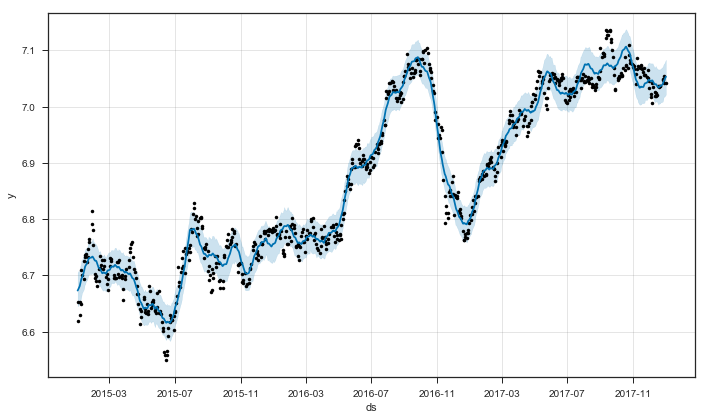

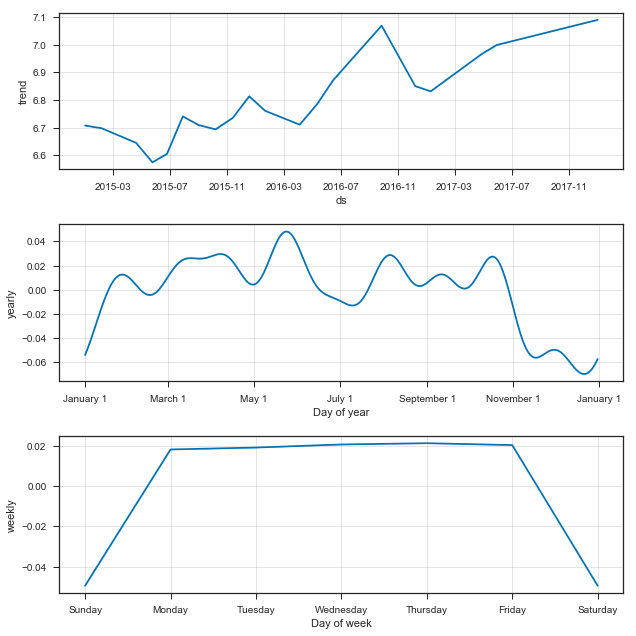

In [108]:
ap_data, ts_data = TS_close_price(ap_data)

In [90]:
# close price cuts short-term moving average

def price_cuts_stma(stock):
    
    close = stock['Close']
    stma = stock['stma']
    
    values1 = [] # close price cuts stma from below 
    values2 = [] # close price cuts stma from above 
    
    for k in range(0, len(stock)):                
        i = j = k
        
        if close[i] == stma[j]: # point of intersection     
            
            if i == 0: # for the first datapoint
                values1.append(np.nan) # previous data point is not available
                values2.append(np.nan) # previous data point is not available
                
            elif (close[i-1] == stma[j] and stma[j-1] < stma[j]):  
                values2.append(1) # close price cuts stma from above
                values1.append(0) # close price cuts ltma from below                
                
            elif (close[i-1] == stma[j] and stma[j-1] > stma[j]):         
                values1.append(1) # close price cuts stma from below
                values2.append(0) # close price cuts stma from above
                      
            elif close[i-1] < stma[j]:           
                values1.append(1) # close price cuts stma from below
                values2.append(0) # close price cuts stma from above
                
            elif close[i-1] > stma[j]: 
                values2.append(1) # close price cuts stma from above
                values1.append(0) # close price cuts stma from below 
                
            else:
                values1.append(0) # close price cuts stma from below
                values2.append(0) # close price cuts stma from above   
        else:
            values1.append(0) # close price cuts stma from below
            values2.append(0) # close price cuts stma from above   
            
    # close price cuts stma from below 
    stock['pr_cut_stma_b'] = values1 
    
    # close price cuts stma from above
    stock['pr_cut_stma_a'] = values2
    
    return stock


In [91]:
ap_date = price_cuts_stma (ap_data)

In [109]:
ap_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,NSE,NASDAQ,DJ,...,beta,scul,scll,stcltb,stclta,dr_dowjones,dr_nasdaq,dr_spy,ds,TS_close_pr
Date_index,,,,,,,,,,,,,,,,,,,,,
2015-01-01,2015-01-01,751.099976,754.500000,747.000000,749.150024,731.869751,284935,8395.450195,4726.810059,17832.990234,...,NaN,0,0,0,0,NaN,NaN,NaN,2015-01-01,790.728536
2015-01-02,2015-01-02,751.250000,781.450012,751.250000,775.049988,757.172302,2080850,8395.450195,4726.810059,17832.990234,...,NaN,0,0,0,0,0.00,0.00,0.00,2015-01-02,791.976160
2015-01-05,2015-01-05,779.900024,787.900024,772.700012,775.000000,757.123535,1326999,8378.400391,4652.569824,17501.650391,...,0.0500,0,0,0,0,-1.86,-1.57,-1.83,2015-01-05,797.020597
2015-01-06,2015-01-06,775.000000,783.000000,750.400024,756.500000,739.050232,1510720,8127.350098,4592.740234,17371.640625,...,0.7967,0,0,0,0,-0.74,-1.29,-0.89,2015-01-06,800.257020
2015-01-07,2015-01-07,763.400024,778.349976,759.250000,771.700012,753.899658,1427667,8102.100098,4650.470215,17584.519531,...,-6.4839,0,0,0,0,1.23,1.26,1.16,2015-01-07,804.038478


In [110]:
ap_data.to_csv('ap.csv')

#### do the visualization 

In [115]:
ap_data.info ()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 741 entries, 2015-01-01 to 2018-01-01
Data columns (total 33 columns):
Date            741 non-null datetime64[ns]
Open            741 non-null float64
High            741 non-null float64
Low             741 non-null float64
Close           741 non-null float64
Adj Close       741 non-null float64
Volume          741 non-null int32
NSE             741 non-null float64
NASDAQ          741 non-null float64
DJ              741 non-null float64
SPY             741 non-null float64
pcod            740 non-null float64
hld             741 non-null float64
rsi             722 non-null float64
stma            722 non-null float64
ltma            642 non-null float64
bbsd            722 non-null float64
bbul            722 non-null float64
bbll            722 non-null float64
vwap            741 non-null float64
price_movmnt    740 non-null float64
dr              740 non-null float64
dr_nse          740 non-null float64
beta            728 

In [111]:
import seaborn as sns

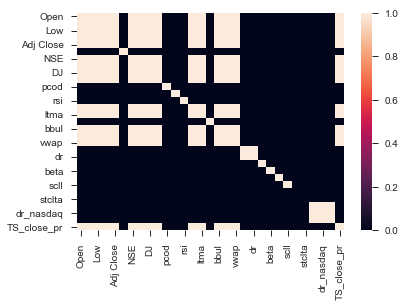

In [114]:
sns.heatmap (ap_data.corr() > 0.6)

#### model application 


In [134]:
ap_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 633 entries, 2015-05-29 to 2017-12-29
Data columns (total 31 columns):
Open            633 non-null float64
High            633 non-null float64
Low             633 non-null float64
Close           633 non-null float64
Adj Close       633 non-null float64
Volume          633 non-null int32
NSE             633 non-null float64
NASDAQ          633 non-null float64
DJ              633 non-null float64
SPY             633 non-null float64
pcod            633 non-null float64
hld             633 non-null float64
rsi             633 non-null float64
stma            633 non-null float64
ltma            633 non-null float64
bbsd            633 non-null float64
bbul            633 non-null float64
bbll            633 non-null float64
vwap            633 non-null float64
price_movmnt    633 non-null float64
dr              633 non-null float64
dr_nse          633 non-null float64
beta            633 non-null float64
scul            633 non-nul

In [132]:
ap_data.drop ('ds', axis = 1 , inplace =True)

In [133]:
ap_data.dropna ( inplace = True)

In [125]:
ap_data.drop ('Date',axis = 1,  inplace = True)

In [135]:
y = ap_data.price_movmnt.values
X = ap_data.drop ('price_movmnt' , axis =1 ).values

In [136]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train , y_test = train_test_split (X, y , test_size = 0.3 , random_state = 42)




# Import suite of algorithms.
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.calibration import CalibratedClassifierCV
#from sklearn.neural_network import MLPClassifier

In [137]:
# Create objects of required models.
models = []
models.append(("LR",LogisticRegression()))
models.append(("GNB",GaussianNB()))
models.append(("KNN",KNeighborsClassifier()))
models.append(("DecisionTree",DecisionTreeClassifier()))
models.append(("LDA",  LinearDiscriminantAnalysis()))
models.append(("QDA",  QuadraticDiscriminantAnalysis()))
models.append(("AdaBoost", AdaBoostClassifier()))
models.append(("SVM Linear",SVC(kernel="linear")))
models.append(("SVM RBF",SVC(kernel="rbf")))
models.append(("Random Forest",  RandomForestClassifier()))
models.append(("Bagging",BaggingClassifier()))
models.append(("Calibrated classifier",CalibratedClassifierCV()))
models.append(("GradientBoosting",GradientBoostingClassifier()))
models.append(("LinearSVC",LinearSVC()))
models.append(("Ridge",RidgeClassifier()))
#models.append(("MLP",MLPClassifier()))

In [ ]:
# Find accuracy of models.
results = []
for name,model in models:
    kfold = KFold(n_splits=10, random_state=0)
    cv_result = cross_val_score(model,X_train,y_train, cv = kfold,scoring = "accuracy")
    results.append(tuple([name,cv_result.mean(), cv_result.std()]))
  
results.sort(key=lambda x: x[1], reverse = True)    
for i in range(len(results)):
    print('{:20s} {:2.2f} (+/-) {:2.2f} '.format(results[i][0] , results[i][1] * 100, results[i][2] * 100))
    



C:\Users\Aditya\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\Aditya\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\Aditya\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\Aditya\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\Aditya\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\Aditya\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\Aditya\

#### model evaluation 


#### hyperparameter tuning 